In [1]:
# Set the working directory

In [2]:
cd /content/drive/MyDrive/Machine-Learning-fetch

/content/drive/MyDrive/Machine-Learning-fetch


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [4]:
df=pd.read_csv('data_daily.csv')

In [5]:
df.columns=['Date','Receipt_count']

In [6]:
# Change Date into datetime format
df['Date']=pd.to_datetime(df['Date'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Receipt_count  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [8]:
df.head()

,Date,Receipt_count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [9]:
df = df.set_index('Date')

In [10]:
df.head()

,Receipt_count
Date,
2021-01-01,7564766
2021-01-02,7455524
2021-01-03,7095414
2021-01-04,7666163
2021-01-05,7771289


In [11]:
df.index = pd.to_datetime(df.index)

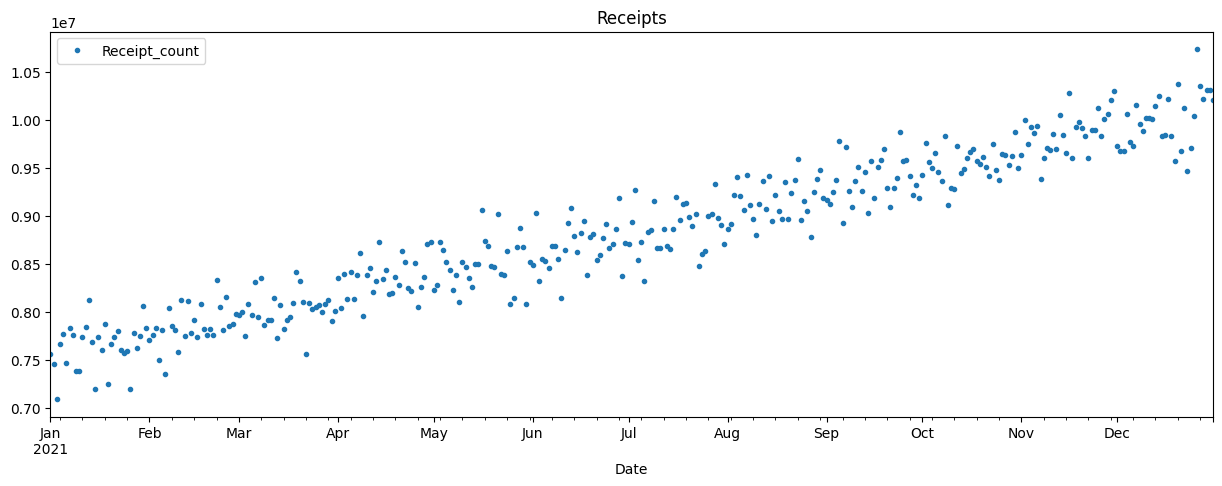

In [12]:
import matplotlib.pyplot as plt
df.plot(style='.',
        figsize=(15, 5),
        title='Receipts')
plt.show()

A linear regression model can be fitted as the data follows a linear trend

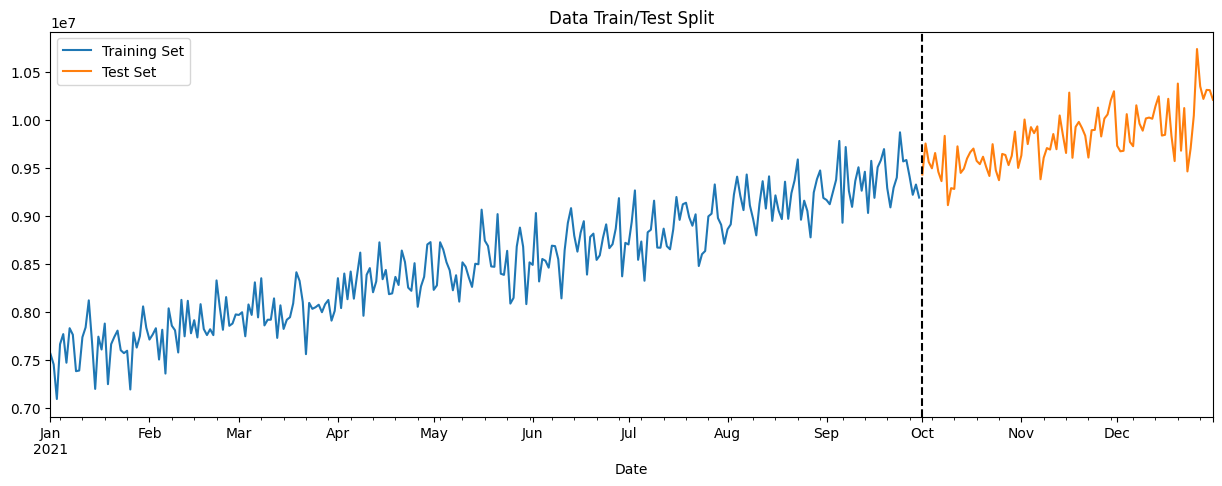

In [13]:
train = df.loc[df.index < '2021-10-01']
test = df.loc[df.index >= '2021-10-01']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2021-10-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [14]:
# Simple Linear Regression model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def normalize(self, X):
        mean = X.mean()
        std = X.std()
        X_normalized = (X - mean) / std
        return X_normalized, mean, std

    def fit(self, X, y):
        # Normalize the features
        X, mean, std = self.normalize(X)

        # Add a column of ones to X for the intercept term
        X = pd.concat([pd.Series(1, index=X.index, name='intercept'), X], axis=1)

        # Initialize theta with zeros
        self.theta = np.zeros(X.shape[1])

        # Gradient Descent
        for _ in range(self.num_iterations):
            predictions = X.dot(self.theta)
            errors = predictions - y
            gradient = X.T.dot(errors) / len(y)
            self.theta -= self.learning_rate * gradient

    def predict(self, X, mean=None, std=None):
        # Normalize the features using the mean and std from training data
        if mean is not None and std is not None:
            X = (X - mean) / std

        # Add a column of ones to X for the intercept term
        X = pd.concat([pd.Series(1, index=X.index, name='intercept'), X], axis=1)
        return X.dot(self.theta)

    def calculate_rmse(self, X, y, mean=None, std=None):
        predictions = self.predict(X, mean, std)
        rmse = np.sqrt(((predictions - y) ** 2).mean())
        return rmse


In [15]:
# Increasing the strength of the dataset by creating additional columns
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

A simple linear regression model considering just one predcitor that is dayofyear

Root Mean Squared Error (RMSE) on test set: 9551151.177335663


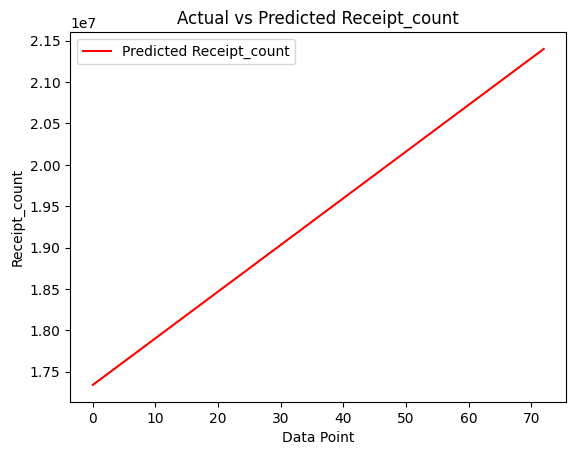

In [16]:
# Sample usage
if __name__ == "__main__":

    # Extract features (X) and target variable (y)
    X = df['dayofyear']
    y = df['Receipt_count']

    # Split data into training and testing sets (80% train, 20% test)
    split_index = int(0.8 * len(X))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]

    # Create and train the linear regression model
    model = LinearRegression(learning_rate=0.0001, num_iterations=1000)
    model.fit(X_train, y_train)

    # Calculate RMSE on the test set
    rmse = model.calculate_rmse(X_test, y_test)

    print("Root Mean Squared Error (RMSE) on test set:", rmse)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Plot predictions against actual values
    # Plot actual value
    # Plot predictions
    plt.plot(range(len(y_test)), predictions, color='red', label="Predicted Receipt_count")

    plt.xlabel("Data Point")
    plt.ylabel("Receipt_count")
    plt.title("Actual vs Predicted Receipt_count")
    plt.legend()
    plt.show()


In [25]:
# Sample usage
if __name__ == "__main__":

    # Extract features (X) and target variable (y)
    X = df[['dayofweek', 'quarter', 'month', 'dayofyear', 'dayofmonth', 'weekofyear']]
    y = df['Receipt_count']

    # Split data into training and testing sets (80% train, 20% test)
    split_index = int(0.8 * len(X))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calculate RMSE on the test set
    rmse = model.calculate_rmse(X_test, y_test)

    print("Root Mean Squared Error (RMSE) on test set:", rmse)

    # Make predictions on the test set
    predictions = model.predict(X_test)



Root Mean Squared Error (RMSE) on test set: 80400105.19258009


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class RegularizedLinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, lambda_l1=0.5, lambda_l2=0.5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.lambda_l1 = lambda_l1
        self.lambda_l2 = lambda_l2
        self.theta = None

    def normalize(self, X):
        mean = X.mean()
        std = X.std()
        X_normalized = (X - mean) / std
        return X_normalized, mean, std

    def fit(self, X, y):
        # Normalize the features
        X, mean, std = self.normalize(X)

        # Add a column of ones to X for the intercept term
        X = pd.concat([pd.Series(1, index=X.index, name='intercept'), X], axis=1)

        # Initialize theta with zeros
        self.theta = np.zeros(X.shape[1])

        # Gradient Descent with L1/L2 regularization
        for _ in range(self.num_iterations):
            predictions = X.dot(self.theta)
            errors = predictions - y
            gradient = (X.T.dot(errors) + self.lambda_l2 * np.sign(self.theta) + self.lambda_l1 * 2 * self.theta) / len(y)
            self.theta -= self.learning_rate * gradient

    def predict(self, X, mean=None, std=None):
        # Normalize the features using the mean and std from training data
        if mean is not None and std is not None:
            X = (X - mean) / std

        # Add a column of ones to X for the intercept term
        X = pd.concat([pd.Series(1, index=X.index, name='intercept'), X], axis=1)
        return X.dot(self.theta)

    def calculate_rmse(self, X, y, mean=None, std=None):
        predictions = self.predict(X, mean, std)
        rmse = np.sqrt(((predictions - y) ** 2).mean())
        return rmse


In [31]:
# Sample usage
if __name__ == "__main__":

    # Extract features (X) and target variable (y)
    X = df[['dayofweek', 'quarter', 'month', 'dayofyear', 'dayofmonth', 'weekofyear']]
    y = df['Receipt_count']

    # Split data into training and testing sets (80% train, 20% test)
    split_index = int(0.8 * len(X))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]

    # Create and train the linear regression model
    model = RegularizedLinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)



In [32]:
# Very High RMSE value makes us to look for a different model . Please refer the other ipynb notebooks for other models